In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

## Loading Dataset

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

#boston_df = pd.read_csv("boston_housing.csv", index_col=0)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


__Descriptions of the dataset variables:__

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Descriptive Statistics and Visualizations

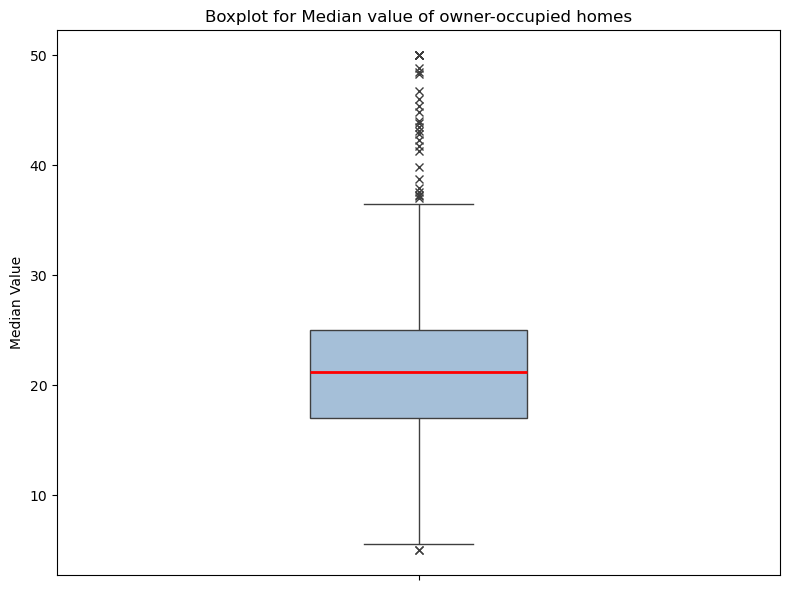

In [3]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y='MEDV', data=boston_df, width=0.3,
                flierprops={"marker": "x"},
                boxprops={"facecolor": (.3, .5, .7, .5)},
                medianprops={"color": "r", "linewidth": 2})

plt.title("Boxplot for Median value of owner-occupied homes")
plt.ylabel("Median Value")

plt.tight_layout()
plt.show()

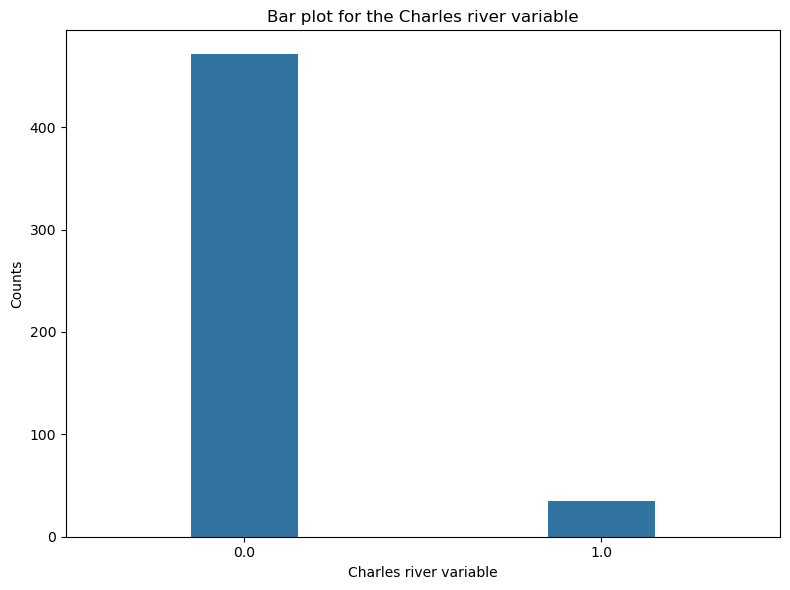

In [4]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(boston_df['CHAS'].value_counts(), width=0.3)

plt.title("Bar plot for the Charles river variable")
plt.xlabel("Charles river variable")
plt.ylabel("Counts")

plt.tight_layout()
plt.show()

In [5]:
boston_df.loc[boston_df['AGE'] < 35, 'age_group'] = "35 years and younger"
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = "between 35 and 70 years"
boston_df.loc[boston_df['AGE'] >= 70, 'age_group'] = "70 years and older"
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


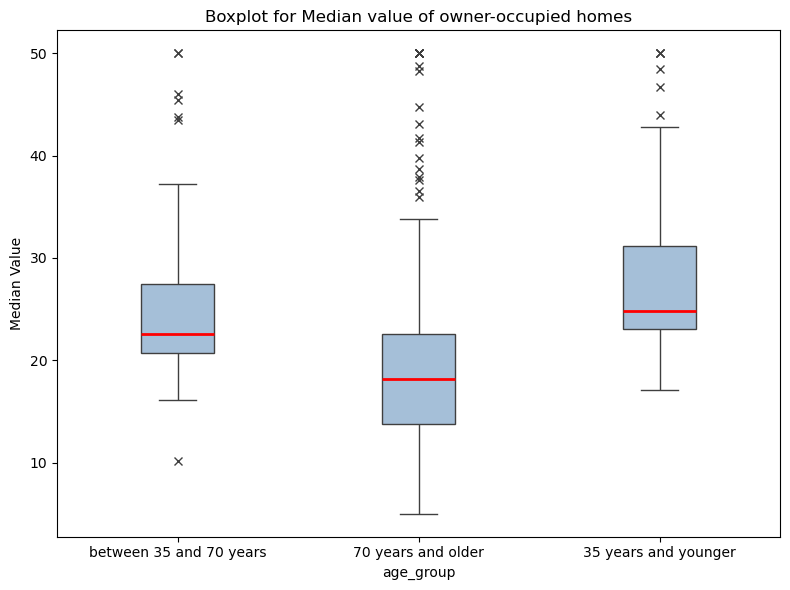

In [6]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df, width=0.3,
                flierprops={"marker": "x"},
                boxprops={"facecolor": (.3, .5, .7, .5)},
                medianprops={"color": "r", "linewidth": 2})

plt.title("Boxplot for Median value of owner-occupied homes")
plt.ylabel("Median Value")

plt.tight_layout()
plt.show()

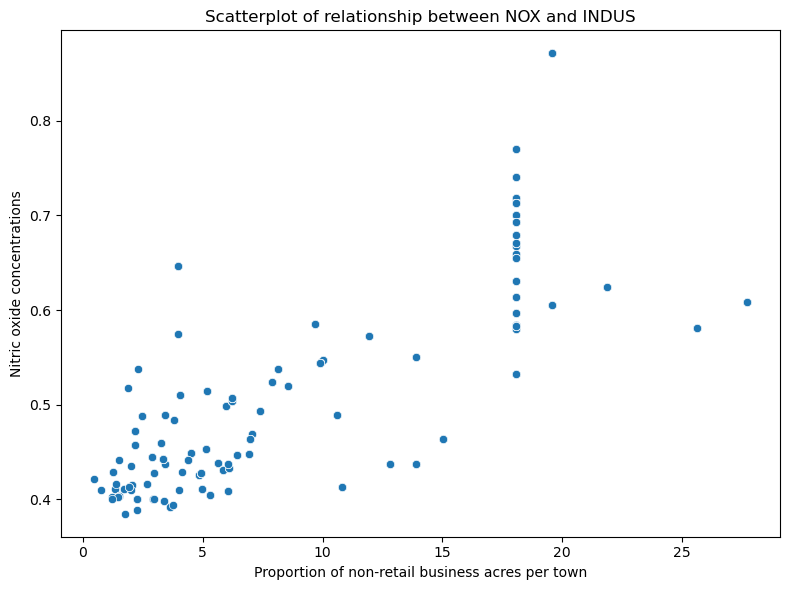

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

plt.title("Scatterplot of relationship between NOX and INDUS")
plt.xlabel("Proportion of non-retail business acres per town")
plt.ylabel("Nitric oxide concentrations")

plt.tight_layout()
plt.show()

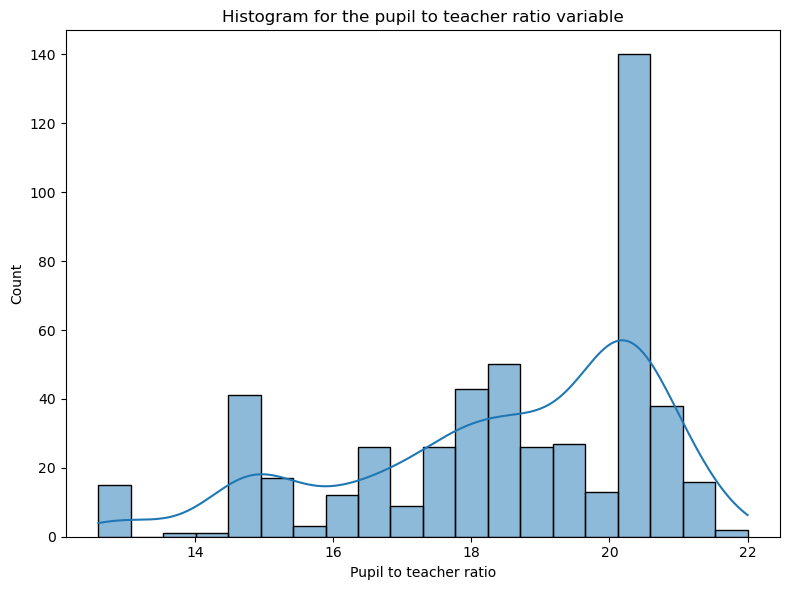

In [8]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(x='PTRATIO', data=boston_df, bins=20, kde=True)

plt.title("Histogram for the pupil to teacher ratio variable")
plt.xlabel("Pupil to teacher ratio")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

## Perform Statistical Tests

__Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)__

H<sub>0</sub>: There is no significant difference in median value of houses bounded by the Charles river<br>
H<sub>1</sub>: There is significant difference in median value of houses bounded by the Charles river

In [9]:
chas_0_medv = boston_df.loc[boston_df['CHAS'] == 0.0]['MEDV']
chas_1_medv = boston_df.loc[boston_df['CHAS'] == 1.0]['MEDV']

In [10]:
stats.ttest_ind(chas_0_medv, chas_1_medv)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

__Conclusion:__ As pvalue is less than 0.05, we can conclude that there is a significant difference in median value of houses bounded by the Charles river.

__Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)__

H<sub>0</sub>: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940<br>
H<sub>1</sub>: There is difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

In [11]:
boston_df['age_group'].unique()

array(['between 35 and 70 years', '70 years and older',
       '35 years and younger'], dtype=object)

In [12]:
groups = []
for group in boston_df['age_group'].unique():
    group_df = boston_df.loc[boston_df['age_group'] == group]['MEDV']
    groups.append(group_df)
    
groups

[0      24.0
 2      34.7
 3      33.4
 4      36.2
 5      28.7
        ... 
 487    20.6
 493    21.8
 494    24.5
 498    21.2
 501    22.4
 Name: MEDV, Length: 128, dtype: float64,
 1      21.6
 7      27.1
 8      16.5
 9      18.9
 10     15.0
        ... 
 500    16.8
 502    20.6
 503    23.9
 504    22.0
 505    11.9
 Name: MEDV, Length: 287, dtype: float64,
 16     23.1
 38     24.7
 39     30.8
 40     34.9
 41     26.6
        ... 
 349    26.6
 352    18.6
 354    18.2
 355    20.6
 495    23.1
 Name: MEDV, Length: 91, dtype: float64]

In [13]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(groups[0], groups[1], groups[2])
print(f_statistic, p_value)

36.40764999196599 1.7105011022702984e-15


__Conclusion:__ As pvalue is less than 0.05, we can conclude that there is difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

__Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)__

H<sub>0</sub>: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town<br>
H<sub>1</sub>: There is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [14]:
x = boston_df['INDUS']
y = boston_df['NOX']

In [15]:
# Calculate the Pearson correlation coefficient and the p-value
correlation, p_value = stats.pearsonr(x, y)
print(correlation, p_value)

0.7636514469209151 7.913361061239527e-98


__Conclusion:__ As pvalue is less than 0.05, we can conclude that there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

__What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)__

H<sub>0</sub>: There is no impact of weighted distance to the five Boston employment centres on the median value of owner occupied homes<br>
H<sub>1</sub>: There is impact of weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [16]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        17:58:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Conclusion:__ As pvalue is less than 0.05, we can conclude that there is impact of weighted distance to the five Boston employment centres on the median value of owner occupied homes.